## Libraries

In [1]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle
# We import the Logistic Regression module from sk learn for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
#We import the necessary libraries for visualization. We set seaborn do be our default.
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
# We import the Linear Regression module from sk learn for the quantity model.
from sklearn.linear_model import LinearRegression

## Data Preparation

In [2]:
#load data
df_purchase = pd.read_csv('purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model

In [3]:
# In order to predict we need input and output variables. 
# Our Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']

In [4]:
# Our dependant variable is based on the average price of chocolate candy bars. 
# Therefore, X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [5]:
# We create a Logistic Regression model using sk learn. Then we fit the model with our X or price and our Y or incidence.
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [6]:
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34823458]])

## Price Elasticity of Purchase Probability

In [7]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

Price_1       Price_2       Price_3       Price_4       Price_5
count  58693.000000  58693.000000  58693.000000  58693.000000  58693.000000
mean       1.392074      1.780999      2.006789      2.159945      2.654798
std        0.091139      0.170868      0.046867      0.089825      0.098272
min        1.100000      1.260000      1.870000      1.760000      2.110000
25%        1.340000      1.580000      1.970000      2.120000      2.630000
50%        1.390000      1.880000      2.010000      2.170000      2.670000
75%        1.470000      1.890000      2.060000      2.240000      2.700000
max        1.590000      1.900000      2.140000      2.260000      2.800000

In [8]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range = pd.DataFrame(price_range)

In [10]:
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

/Users/johnhaydon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics part of the course.
df_price_elasticities = pd.DataFrame(price_range)

In [12]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

Price_Point   Mean_PE
0           0.50 -0.096372
1           0.51 -0.100439
2           0.52 -0.104633
3           0.53 -0.108957
4           0.54 -0.113415
..           ...       ...
295         3.45 -8.013526
296         3.46 -8.038777
297         3.47 -8.063995
298         3.48 -8.089178
299         3.49 -8.114328

[300 rows x 2 columns]

In [13]:
pd.options.display.max_rows = None
df_price_elasticities

Price_Point   Mean_PE
0           0.50 -0.096372
1           0.51 -0.100439
2           0.52 -0.104633
3           0.53 -0.108957
4           0.54 -0.113415
5           0.55 -0.118009
6           0.56 -0.122743
7           0.57 -0.127620
8           0.58 -0.132644
9           0.59 -0.137818
10          0.60 -0.143146
11          0.61 -0.148631
12          0.62 -0.154276
13          0.63 -0.160086
14          0.64 -0.166064
15          0.65 -0.172214
16          0.66 -0.178540
17          0.67 -0.185045
18          0.68 -0.191733
19          0.69 -0.198609
20          0.70 -0.205676
21          0.71 -0.212938
22          0.72 -0.220399
23          0.73 -0.228063
24          0.74 -0.235934
25          0.75 -0.244017
26          0.76 -0.252315
27          0.77 -0.260833
28          0.78 -0.269574
29          0.79 -0.278543
30          0.80 -0.287745
31          0.81 -0.297182
32          0.82 -0.306860
33          0.83 -0.316783
34          0.84 -0.326955
35          0.85 -0.337379
36          0.86 -0.348061
37          0.87 -0.359004
38          0.88 -0.370213
39          0.89 -0.381692
40          0.90 -0.393444
41          0.91 -0.405474
42          0.92 -0.417786
43          0.93 -0.430385
44          0.94 -0.443273
45          0.95 -0.456455
46          0.96 -0.469935
47          0.97 -0.483716
48          0.98 -0.497802
49          0.99 -0.512198
50          1.00 -0.526906
51          1.01 -0.541931
52          1.02 -0.557275
53          1.03 -0.572942
54          1.04 -0.588935
55          1.05 -0.605258
56          1.06 -0.621913
57          1.07 -0.638903
58          1.08 -0.656232
59          1.09 -0.673901
60          1.10 -0.691914
61          1.11 -0.710273
62          1.12 -0.728981
63          1.13 -0.748038
64          1.14 -0.767449
65          1.15 -0.787213
66          1.16 -0.807334
67          1.17 -0.827812
68          1.18 -0.848648
69          1.19 -0.869845
70          1.20 -0.891404
71          1.21 -0.913324
72          1.22 -0.935606
73          1.23 -0.958252
74          1.24 -0.981261
75          1.25 -1.004633
76          1.26 -1.028368
77          1.27 -1.052467
78          1.28 -1.076927
79          1.29 -1.101750
80          1.30 -1.126932
81          1.31 -1.152475
82          1.32 -1.178375
83          1.33 -1.204631
84          1.34 -1.231242
85          1.35 -1.258206
86          1.36 -1.285520
87          1.37 -1.313181
88          1.38 -1.341188
89          1.39 -1.369537
90          1.40 -1.398225
91          1.41 -1.427249
92          1.42 -1.456605
93          1.43 -1.486289
94          1.44 -1.516298
95          1.45 -1.546627
96          1.46 -1.577272
97          1.47 -1.608229
98          1.48 -1.639492
99          1.49 -1.671057
100         1.50 -1.702919
101         1.51 -1.735072
102         1.52 -1.767511
103         1.53 -1.800231
104         1.54 -1.833225
105         1.55 -1.866488
106         1.56 -1.900014
107         1.57 -1.933796
108         1.58 -1.967829
109         1.59 -2.002105
110         1.60 -2.036618
111         1.61 -2.071362
112         1.62 -2.106329
113         1.63 -2.141514
114         1.64 -2.176908
115         1.65 -2.212505
116         1.66 -2.248298
117         1.67 -2.284279
118         1.68 -2.320442
119         1.69 -2.356779
120         1.70 -2.393283
121         1.71 -2.429947
122         1.72 -2.466763
123         1.73 -2.503724
124         1.74 -2.540822
125         1.75 -2.578051
126         1.76 -2.615402
127         1.77 -2.652869
128         1.78 -2.690445
129         1.79 -2.728121
130         1.80 -2.765892
131         1.81 -2.803748
132         1.82 -2.841685
133         1.83 -2.879694
134         1.84 -2.917769
135         1.85 -2.955902
136         1.86 -2.994087
137         1.87 -3.032318
138         1.88 -3.070587
139         1.89 -3.108887
140         1.90 -3.147214
141         1.91 -3.185559
142         1.92 -3.223917
143         1.93 -3.262283
144         1.94 -3.300649
145         1.95 -3.339010
146         1.96 -3.377360
147      

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

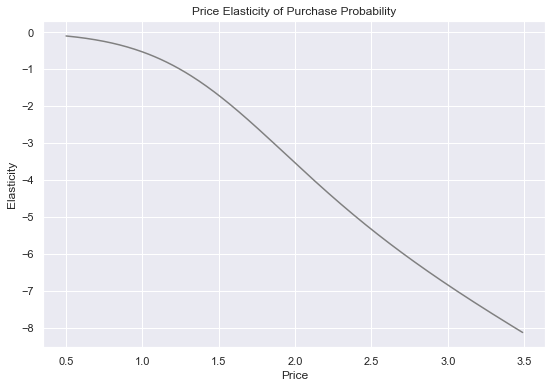

In [14]:
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability by Segments

### $\color{green}{\text{Segment 1 - Career-Focused}}$

In [15]:
# We filter the data to contain only customers from segment 1, the career-focused.
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [16]:
# Again we want to predict the purchase probability, so our Y variable is the incidence column.
# Only here we select only the customers from the first segment.
Y = df_pa_segment_1['Incidence']

In [17]:
X = pd.DataFrame()

In [18]:
# We calculate the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [19]:
# Fit logistic regression model
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [20]:
# We observe that the price coefficient for the career focused is -1.7, whereas for the average customer it was -2.35.
# This is an indicator, that this segment is less price sensitive compared to the average customer.
model_incidence_segment_1.coef_

array([[-1.71186331]])

In [21]:
# Calculate Price Elasticity of the career-focused segment.
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

/Users/johnhaydon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Results

In [22]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

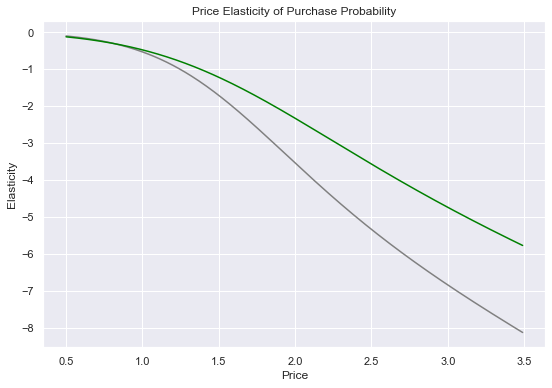

In [23]:
# We plot the elasticities of the average customer and the career-focused segment side by side. 
# The career-focused segment is displayed in green. The same color we used during the descriptive analysis.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{red}{\text{Segment 2 - Fewer-Opportunities}}$

In [24]:
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [25]:
# Logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

/Users/johnhaydon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Results

In [26]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

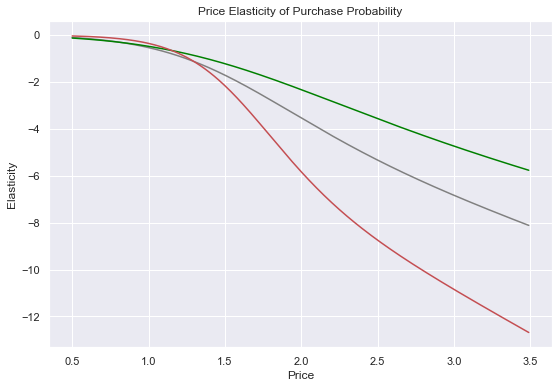

In [27]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## ${\textbf{Homework}}$

### $\color{blue}{\text{Segment 0 - Standard}}$

In [28]:
# Select only customers from segment 0, the standard segment.
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

/Users/johnhaydon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### $\color{orange}{\text{Segment 3 - Well-Off}}$

In [29]:
# Select only customers from segment 3 
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]
# Prepare dependant and independant variables.
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5
# Logistic regression model
model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

/Users/johnhaydon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096372     -0.211265     -0.119094     -0.030624   
1           0.51 -0.100439     -0.217838     -0.123277     -0.032374   
2           0.52 -0.104633     -0.224520     -0.127553     -0.034210   
3           0.53 -0.108957     -0.231309     -0.131925     -0.036135   
4           0.54 -0.113415     -0.238208     -0.136392     -0.038155   
5           0.55 -0.118009     -0.245217     -0.140957     -0.040273   
6           0.56 -0.122743     -0.252337     -0.145622     -0.042492   
7           0.57 -0.127620     -0.259569     -0.150387     -0.044819   
8           0.58 -0.132644     -0.266913     -0.155254     -0.047257   
9           0.59 -0.137818     -0.274370     -0.160226     -0.049812   
10          0.60 -0.143146     -0.281940     -0.165302     -0.052488   
11          0.61 -0.148631     -0.289625     -0.170485     -0.055291   
12          0.62 -0.154276     -0.297424     -0.175776     -0.058226   
13          0.63 -0.160086     -0.305339     -0.181177     -0.061299   
14          0.64 -0.166064     -0.313370     -0.186689     -0.064515   
15          0.65 -0.172214     -0.321518     -0.192314     -0.067882   
16          0.66 -0.178540     -0.329783     -0.198053     -0.071404   
17          0.67 -0.185045     -0.338166     -0.203908     -0.075089   
18          0.68 -0.191733     -0.346667     -0.209881     -0.078943   
19          0.69 -0.198609     -0.355287     -0.215972     -0.082974   
20          0.70 -0.205676     -0.364026     -0.222183     -0.087189   
21          0.71 -0.212938     -0.372885     -0.228517     -0.091595   
22          0.72 -0.220399     -0.381864     -0.234974     -0.096201   
23          0.73 -0.228063     -0.390963     -0.241556     -0.101014   
24          0.74 -0.235934     -0.400183     -0.248264     -0.106042   
25          0.75 -0.244017     -0.409525     -0.255100     -0.111295   
26          0.76 -0.252315     -0.418988     -0.262066     -0.116781   
27          0.77 -0.260833     -0.428572     -0.269162     -0.122510   
28          0.78 -0.269574     -0.438279     -0.276391     -0.128491   
29          0.79 -0.278543     -0.448108     -0.283754     -0.134735   
30          0.80 -0.287745     -0.458060     -0.291252     -0.141250   
31          0.81 -0.297182     -0.468135     -0.298886     -0.148049   
32          0.82 -0.306860     -0.478332     -0.306659     -0.155142   
33          0.83 -0.316783     -0.488653     -0.314572     -0.162539   
34          0.84 -0.326955     -0.499096     -0.322626     -0.170253   
35          0.85 -0.337379     -0.509663     -0.330822     -0.178295   
36          0.86 -0.348061     -0.520354     -0.339161     -0.186678   
37          0.87 -0.359004     -0.531167     -0.347646     -0.195414   
38          0.88 -0.370213     -0.542105     -0.356278     -0.204517   
39          0.89 -0.381692     -0.553165     -0.365057     -0.213999   
40          0.90 -0.393444     -0.564349     -0.373986     -0.223873   
41          0.91 -0.405474     -0.575656     -0.383064     -0.234155   
42          0.92 -0.417786     -0.587086     -0.392295     -0.244858   
43          0.93 -0.430385     -0.598638     -0.401679     -0.255997   
44          0.94 -0.443273     -0.610314     -0.411216     -0.267587   
45          0.95 -0.456455     -0.622113     -0.420909     -0.279644   
46          0.96 -0.469935     -0.634033     -0.430759     -0.292182   
47          0.97 -0.483716     -0.646076     -0.440766     -0.305219   
48          0.98 -0.497802     -0.658241     -0.450932     -0.318770   
49          0.99 -0.512198     -0.670527     -0.461258     -0.332852   
50          1.00 -0.526906     -0.682934     -0.471745     -0.347482   
51          1.01 -0.541931     -0.695462     -0.482394     -0.362678   
52          1.02 -0.557275     -0.708111     -0.493205     -0.378456   
53          1.03 -0.572942     -0.720880     -0.504181     -0.394835   
54          1.04 -0.588935     -0.733768     

### ${\textbf{Results}}$

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

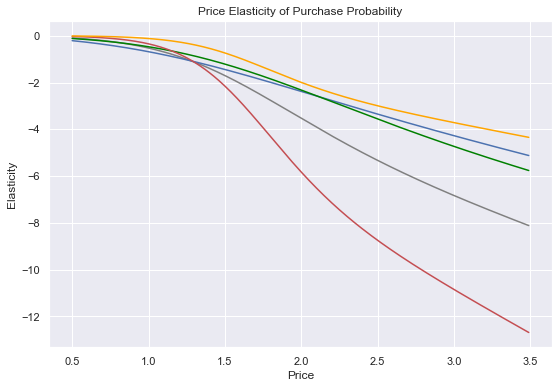

In [30]:
# We display all elasticities of purchase probability on the same plot. 
# We observe that the Career-focused segment are the least elastic when compared to the rest. 
# So, their purchase probability elasticity is not as affected by price.
# The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that
# the standard segment is least homogenous, which we discovered during our descriptive analysis. 
# It may be that the customers in this segment have different shopping habbits, which is why their 
# customers start with being more elastic than average but then shift to being more inelastic than the average customer
# and indeed the Career-focused segment.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

### Data Preparation

In [31]:
Y = df_pa['Incidence']

In [32]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [33]:
# We include a second promotion feature. We'd like to examine the effects of promotions on purchase probability.
# We calculate the average promotion rate across the five brands. We add the mean price for the brands.
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

Mean_Price  Mean_Promotion
0       2.044             0.2
1       2.028             0.0
2       2.028             0.0
3       2.028             0.0
4       2.030             0.0

## Model Estimation

In [34]:
# The coefficient for promotion is positive. 
# Therefore, there is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49378162,  0.56144123]])

## Price Elasticity with Promotion

In [35]:
# We create a data frame on which our model will predict. We need to include A price and promotion feature.
# First, we'll include the price range as the price feature. Next, we'll include the promotion feature.
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [36]:
# We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1

In [37]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

/Users/johnhaydon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [38]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [39]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096372     -0.211265     -0.119094     -0.030624   
1           0.51 -0.100439     -0.217838     -0.123277     -0.032374   
2           0.52 -0.104633     -0.224520     -0.127553     -0.034210   
3           0.53 -0.108957     -0.231309     -0.131925     -0.036135   
4           0.54 -0.113415     -0.238208     -0.136392     -0.038155   
5           0.55 -0.118009     -0.245217     -0.140957     -0.040273   
6           0.56 -0.122743     -0.252337     -0.145622     -0.042492   
7           0.57 -0.127620     -0.259569     -0.150387     -0.044819   
8           0.58 -0.132644     -0.266913     -0.155254     -0.047257   
9           0.59 -0.137818     -0.274370     -0.160226     -0.049812   
10          0.60 -0.143146     -0.281940     -0.165302     -0.052488   
11          0.61 -0.148631     -0.289625     -0.170485     -0.055291   
12          0.62 -0.154276     -0.297424     -0.175776     -0.058226   
13          0.63 -0.160086     -0.305339     -0.181177     -0.061299   
14          0.64 -0.166064     -0.313370     -0.186689     -0.064515   
15          0.65 -0.172214     -0.321518     -0.192314     -0.067882   
16          0.66 -0.178540     -0.329783     -0.198053     -0.071404   
17          0.67 -0.185045     -0.338166     -0.203908     -0.075089   
18          0.68 -0.191733     -0.346667     -0.209881     -0.078943   
19          0.69 -0.198609     -0.355287     -0.215972     -0.082974   
20          0.70 -0.205676     -0.364026     -0.222183     -0.087189   
21          0.71 -0.212938     -0.372885     -0.228517     -0.091595   
22          0.72 -0.220399     -0.381864     -0.234974     -0.096201   
23          0.73 -0.228063     -0.390963     -0.241556     -0.101014   
24          0.74 -0.235934     -0.400183     -0.248264     -0.106042   
25          0.75 -0.244017     -0.409525     -0.255100     -0.111295   
26          0.76 -0.252315     -0.418988     -0.262066     -0.116781   
27          0.77 -0.260833     -0.428572     -0.269162     -0.122510   
28          0.78 -0.269574     -0.438279     -0.276391     -0.128491   
29          0.79 -0.278543     -0.448108     -0.283754     -0.134735   
30          0.80 -0.287745     -0.458060     -0.291252     -0.141250   
31          0.81 -0.297182     -0.468135     -0.298886     -0.148049   
32          0.82 -0.306860     -0.478332     -0.306659     -0.155142   
33          0.83 -0.316783     -0.488653     -0.314572     -0.162539   
34          0.84 -0.326955     -0.499096     -0.322626     -0.170253   
35          0.85 -0.337379     -0.509663     -0.330822     -0.178295   
36          0.86 -0.348061     -0.520354     -0.339161     -0.186678   
37          0.87 -0.359004     -0.531167     -0.347646     -0.195414   
38          0.88 -0.370213     -0.542105     -0.356278     -0.204517   
39          0.89 -0.381692     -0.553165     -0.365057     -0.213999   
40          0.90 -0.393444     -0.564349     -0.373986     -0.223873   
41          0.91 -0.405474     -0.575656     -0.383064     -0.234155   
42          0.92 -0.417786     -0.587086     -0.392295     -0.244858   
43          0.93 -0.430385     -0.598638     -0.401679     -0.255997   
44          0.94 -0.443273     -0.610314     -0.411216     -0.267587   
45          0.95 -0.456455     -0.622113     -0.420909     -0.279644   
46          0.96 -0.469935     -0.634033     -0.430759     -0.292182   
47          0.97 -0.483716     -0.646076     -0.440766     -0.305219   
48          0.98 -0.497802     -0.658241     -0.450932     -0.318770   
49          0.99 -0.512198     -0.670527     -0.461258     -0.332852   
50          1.00 -0.526906     -0.682934     -0.471745     -0.347482   
51          1.01 -0.541931     -0.695462     -0.482394     -0.362678   
52          1.02 -0.557275     -0.708111     -0.493205     -0.378456   
53          1.03 -0.572942     -0.720880     -0.504181     -0.394835   
54          1.04 -0.588935     -0.733768     

## Price Elasticity without Promotion

In [40]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [41]:
# Promotion feature -No Promotion.
# We assume there aren't any promotional activities on any of the price points.
# We examine the elasticity of purchase probability when there isn't promotion.
df_price_elasticity_promotion_no['Promotion'] = 0

In [42]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

/Users/johnhaydon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [43]:
no_promo = Y_no_promo[: , 1]

In [44]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [45]:
# Update master data frame to include purchase probability elasticities without promotion.
# We can now see the values with and without promotion and compare them for each price point in our price range.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

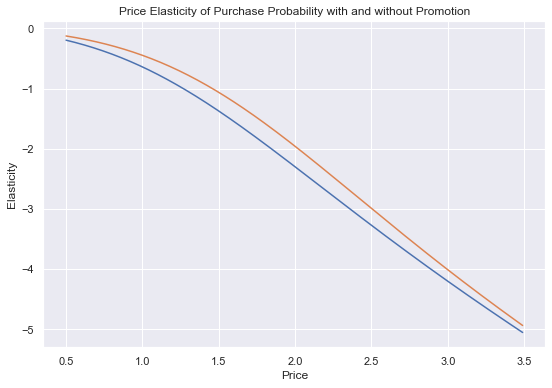

In [46]:
# Plot purchase elasticities with and without promotion side by side for comprarisson.
# Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.
# This is an important insight for marketers, as according to our model people are more likely to buy a product if there is
# some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')